In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Lead_Scoring.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# To fill null values in TotalVisits and Page Views Per Visit

# Step 1: Calculate the mean for converted leads
mean_total_visits_converted = df[df['Converted'] == 1]['TotalVisits'].mean()
mean_page_views_converted = df[df['Converted'] == 1]['Page Views Per Visit'].mean()

# Step 2: Calculate the mean for not converted leads
mean_total_visits_not_converted = df[df['Converted'] == 0]['TotalVisits'].mean()
mean_page_views_not_converted = df[df['Converted'] == 0]['Page Views Per Visit'].mean()

# Step 3: Fill null values in TotalVisits and Page Views Per Visit
df.loc[(df['Converted'] == 1) & (df['TotalVisits'].isnull()), 'TotalVisits'] = mean_total_visits_converted
df.loc[(df['Converted'] == 1) & (df['Page Views Per Visit'].isnull()), 'Page Views Per Visit'] = mean_page_views_converted

df.loc[(df['Converted'] == 0) & (df['TotalVisits'].isnull()), 'TotalVisits'] = mean_total_visits_not_converted
df.loc[(df['Converted'] == 0) & (df['Page Views Per Visit'].isnull()), 'Page Views Per Visit'] = mean_page_views_not_converted

# Optional: Check if there are any remaining null values
print("Remaining null values in TotalVisits:", df['TotalVisits'].isnull().sum())
print("Remaining null values in Page Views Per Visit:", df['Page Views Per Visit'].isnull().sum())

Remaining null values in TotalVisits: 0
Remaining null values in Page Views Per Visit: 0


In [ ]:
df[]

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [ ]:
# Hypothesis: If a non-paying customer has spent time on website greater than 1000 then he can be converted to paying customer

bins = [0, 501, 1001, 1501, 2001, float('inf')]  # Define the ranges
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2000+']  # Labels for the ranges

# Create a new column for visit ranges
df['Time Spent'] = pd.cut(df['Total Time Spent on Website'], bins=bins, labels=labels, right=False)

# print(df['Visit Range'])

# Step 6: Initialize a dictionary to hold the summary data
summary_data = {}

# Calculate the summary for each visit range
for val in labels:  # Iterate over the defined labels to ensure all ranges are included
    converted_sum = df[df['Time Spent'] == val]['Converted'].sum()  # Sum of converted leads
    total_leads = df[df['Time Spent'] == val]['Converted'].count()  # Total leads in the range
    not_converted = total_leads - converted_sum  # Calculate not converted leads
    conversion_ratio = round(converted_sum / total_leads * 100, 2) if total_leads > 0 else 0  # Conversion ratio
    summary_data[val] = [total_leads, converted_sum, not_converted, conversion_ratio]  # Store in dictionary

# Create a DataFrame from the summary data
summary_df = pd.DataFrame.from_dict(summary_data, orient='index', 
                                     columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio'])

# Reset index for plotting
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Time Spent'}, inplace=True)

# Sort the DataFrame by Conversion Ratio in descending order
summary_df_sorted = summary_df.sort_values(by='Conversion Ratio', ascending=False)

# Print the summary DataFrame to check the counts
print(summary_df_sorted)

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
bar_width = 0.35  # Width of the bars
x = range(len(summary_df))  # X locations for the groups

# Create bars for converted and not converted
plt.bar(x, summary_df['Converted'], width=bar_width, label='Converted', color='skyblue')  # Converted leads
plt.bar([p + bar_width for p in x], summary_df['Not Converted'], width=bar_width, label='Not Converted', color='salmon')  # Not converted leads

# Adding labels and title
plt.title('Converted and Not Converted Leads by Time Spent Ranges')  # Title of the plot
plt.xlabel('Time Spent')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks([p + bar_width / 2 for p in x], summary_df['Time Spent'])  # Center the x-ticks
plt.legend()  # Show legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.ylim(0, summary_df[['Converted', 'Not Converted']].max().max() + 10)  # Set y-axis limit for better visibility
plt.show()  # Display the plot

In [ ]:
converted = df[df['Converted'] == 1]
not_converted = df[df['Converted']==0]
print('Total Visits')
print('Converted - Mean : ',converted['TotalVisits'].mean())
print('Not converted - Mean : ' ,not_converted['TotalVisits'].mean())

print('Converted - Max: ',converted['TotalVisits'].max())
print('Not converted - Max : ' ,not_converted['TotalVisits'].max())

print('Converted - Min : ',converted['TotalVisits'].min())
print('Not converted - Min : ' ,not_converted['TotalVisits'].min())

In [ ]:
# Hypothesis : If a not paying customer has more visits then he can be converted to paying customer

# Define visit ranges as specified
bins = [0, 6, 11, 16, 21, float('inf')]  # Define the ranges
labels = ['0-5', '6-10', '11-15', '16-20', '20+']  # Labels for the ranges

# Create a new column for visit ranges
df['Visit Range'] = pd.cut(df['TotalVisits'], bins=bins, labels=labels, right=False)

# Initialize a dictionary to hold the summary data
summary_data = {}

# Calculate the summary for each visit range
for val in labels:  # Iterate over the defined labels to ensure all ranges are included
    converted_sum = df[df['Visit Range'] == val]['Converted'].sum()  # Sum of converted leads
    total_leads = df[df['Visit Range'] == val]['Converted'].count()  # Total leads in the range
    not_converted = total_leads - converted_sum  # Calculate not converted leads
    conversion_ratio = round(converted_sum / total_leads * 100, 2) if total_leads > 0 else 0  # Conversion ratio
    summary_data[val] = [total_leads, converted_sum, not_converted, conversion_ratio]  # Store in dictionary

# Create a DataFrame from the summary data
summary_df = pd.DataFrame.from_dict(summary_data, orient='index', 
                                     columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio'])

# Reset index for plotting
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Visit Range'}, inplace=True)

# Sort the DataFrame by Conversion Ratio in descending order
summary_df_sorted = summary_df.sort_values(by='Conversion Ratio', ascending=False)

# Print the summary DataFrame to check the counts
print(summary_df)

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
bar_width = 0.35  # Width of the bars
x = range(len(summary_df))  # X locations for the groups

# Create bars for converted and not converted
plt.bar(x, summary_df['Converted'], width=bar_width, label='Converted', color='skyblue')  # Converted leads
plt.bar([p + bar_width for p in x], summary_df['Not Converted'], width=bar_width, label='Not Converted', color='salmon')  # Not converted leads

# Adding labels and title
plt.title('Converted and Not Converted Leads by Total Visits')  # Title of the plot
plt.xlabel('Visit Range')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks([p + bar_width / 2 for p in x], summary_df['Visit Range'])  # Center the x-ticks
plt.legend()  # Show legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.ylim(0, summary_df[['Converted', 'Not Converted']].max().max() + 10)  # Set y-axis limit for better visibility
 
plt.show()  # Display the plot

In [ ]:
# unique_tags = df['Tags'].unique()
# print(len(unique_tags))


tag_counts = df.groupby('Tags')['Converted'].value_counts().unstack(fill_value=0)

# Step 2: Rename the columns for clarity
tag_counts.columns = ['Not Converted', 'Converted']

# Step 3: Print the counts
print(tag_counts)

In [ ]:
converted[converted['Tags']=='Interested in other courses']

                               Prospect ID  Lead Number  \
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
6     9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
10    2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11    9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
...                                    ...          ...   
9233  3f715465-2546-47cd-afa8-8b8dc63b8b43       579622   
9234  c0b25922-511f-4c56-852e-ced210a45447       579615   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
2     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
6     Landing Page Submission          Google           No          N

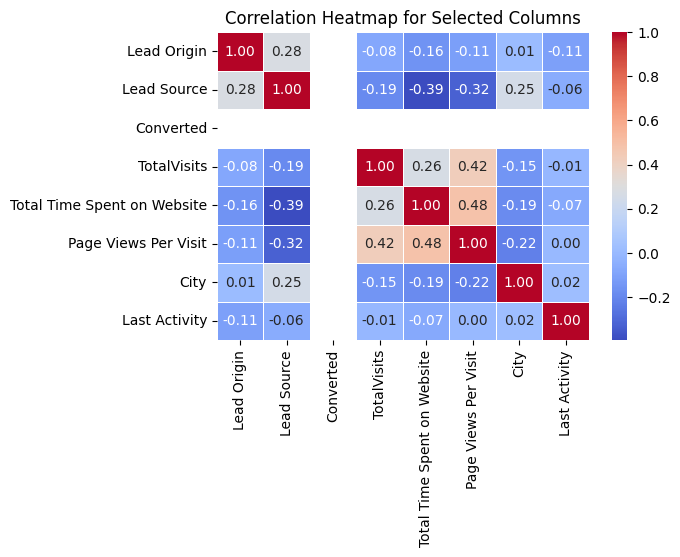

In [14]:
columns = ['Lead Origin','Lead Source','Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit','City','Last Activity']
converted_encoded = converted.copy()
print(converted)
for col in ['Lead Origin', 'Lead Source', 'City','Last Activity']:  # Categorical columns
    converted_encoded[col] = converted[col].astype('category').cat.codes  # Label Encoding

print(converted_encoded)
# Compute correlation
correlation = converted_encoded[columns].corr()

plt.figure(figsize=(6,4))  # Adjust figure size
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Selected Columns")
plt.show()

C:\Users\yeswa\AppData\Local\Temp\ipykernel_9988\4259478400.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lead_source_counts.index, y=lead_source_counts.values, palette="viridis")


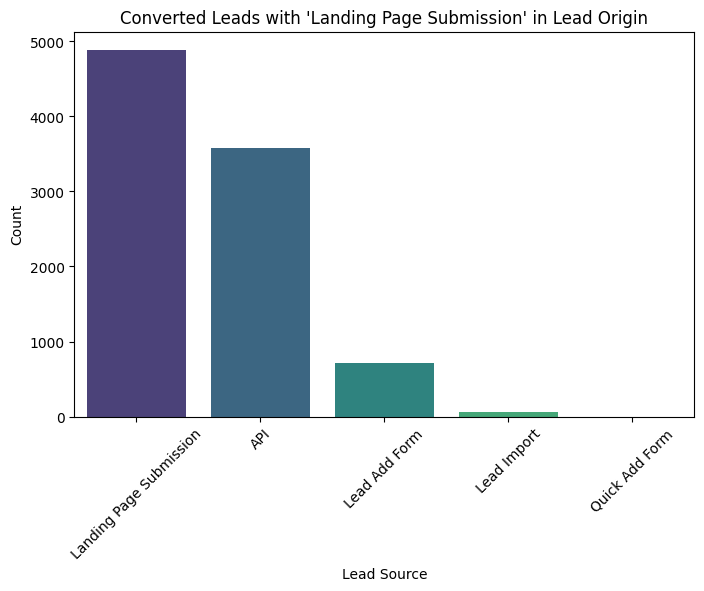

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data where 'Converted' is 1 and 'Lead Origin' is 'Landing Page Submission'
# filtered_df = df[(df['Converted'] == 1) & (df['Lead Origin'] == 'Landing Page Submission')]
filtered_df = df
# Count occurrences of 'Lead Source' for these leads
lead_source_counts = filtered_df['Lead Origin'].value_counts()

# Plot bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x=lead_source_counts.index, y=lead_source_counts.values, palette="viridis")
plt.xlabel("Lead Source")
plt.ylabel("Count")
plt.title("Converted Leads with 'Landing Page Submission' in Lead Origin")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


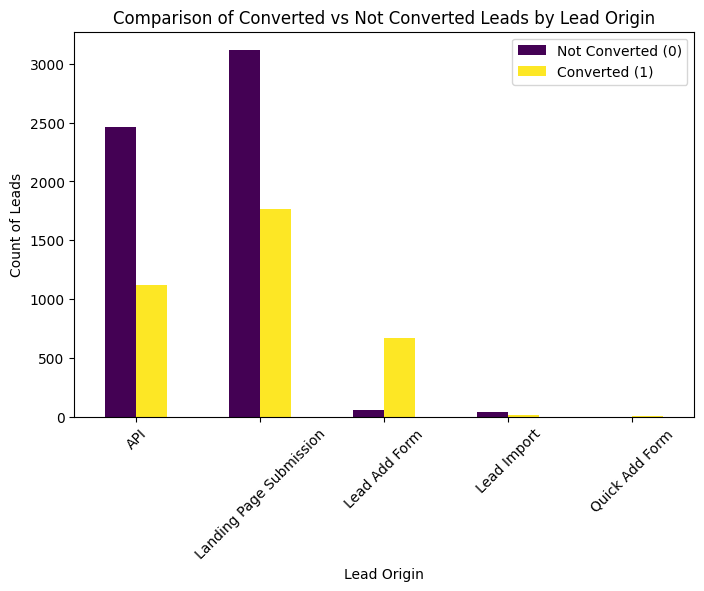

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of 'Converted' (0 and 1) for each 'Lead Origin'
conversion_counts = df.groupby(['Lead Origin', 'Converted']).size().unstack()

# Plot the grouped bar chart
conversion_counts.plot(kind='bar', figsize=(8, 5), colormap="viridis")

plt.xlabel("Lead Origin")
plt.ylabel("Count of Leads")
plt.title("Comparison of Converted vs Not Converted Leads by Lead Origin")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(["Not Converted (0)", "Converted (1)"])  # Label the bars
plt.show()


In [20]:
df.nunique()


Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

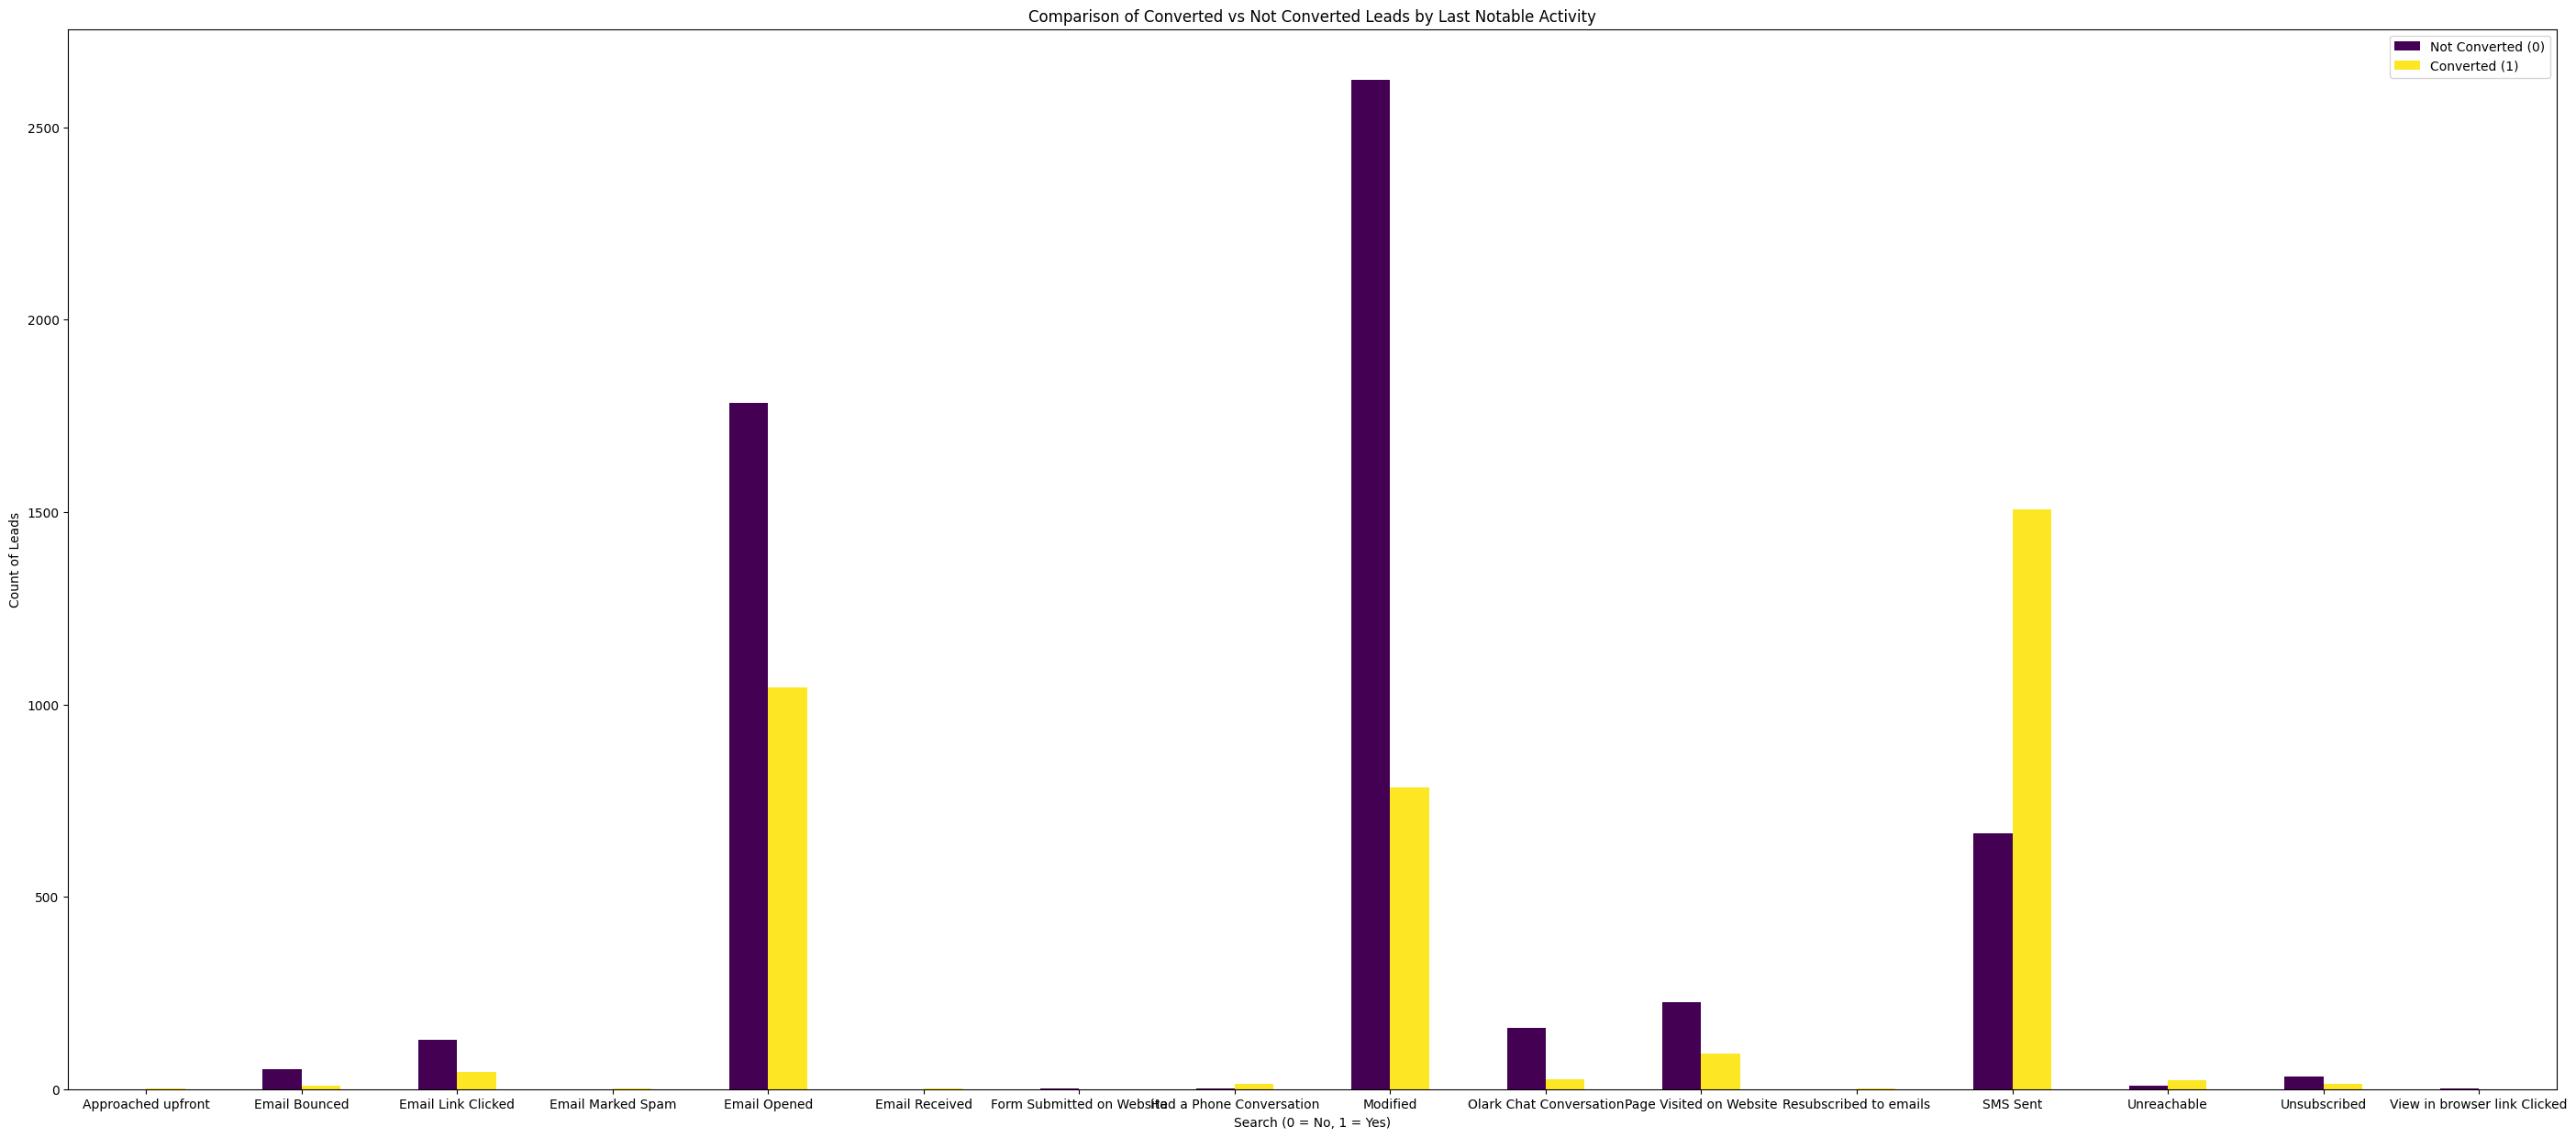

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of 'Converted' (0 and 1) for each 'Search' value
counts = df.groupby(['Last Notable Activity', 'Converted']).size().unstack()

# Plot the grouped bar chart
counts.plot(kind='bar', figsize=(35, 15), colormap="viridis")

plt.xlabel("Search (0 = No, 1 = Yes)")
plt.ylabel("Count of Leads")
plt.title("Comparison of Converted vs Not Converted Leads by Last Notable Activity")
plt.xticks(rotation=0)  # Keep x-axis labels readable
plt.legend(["Not Converted (0)", "Converted (1)"])  # Label the bars
plt.show()

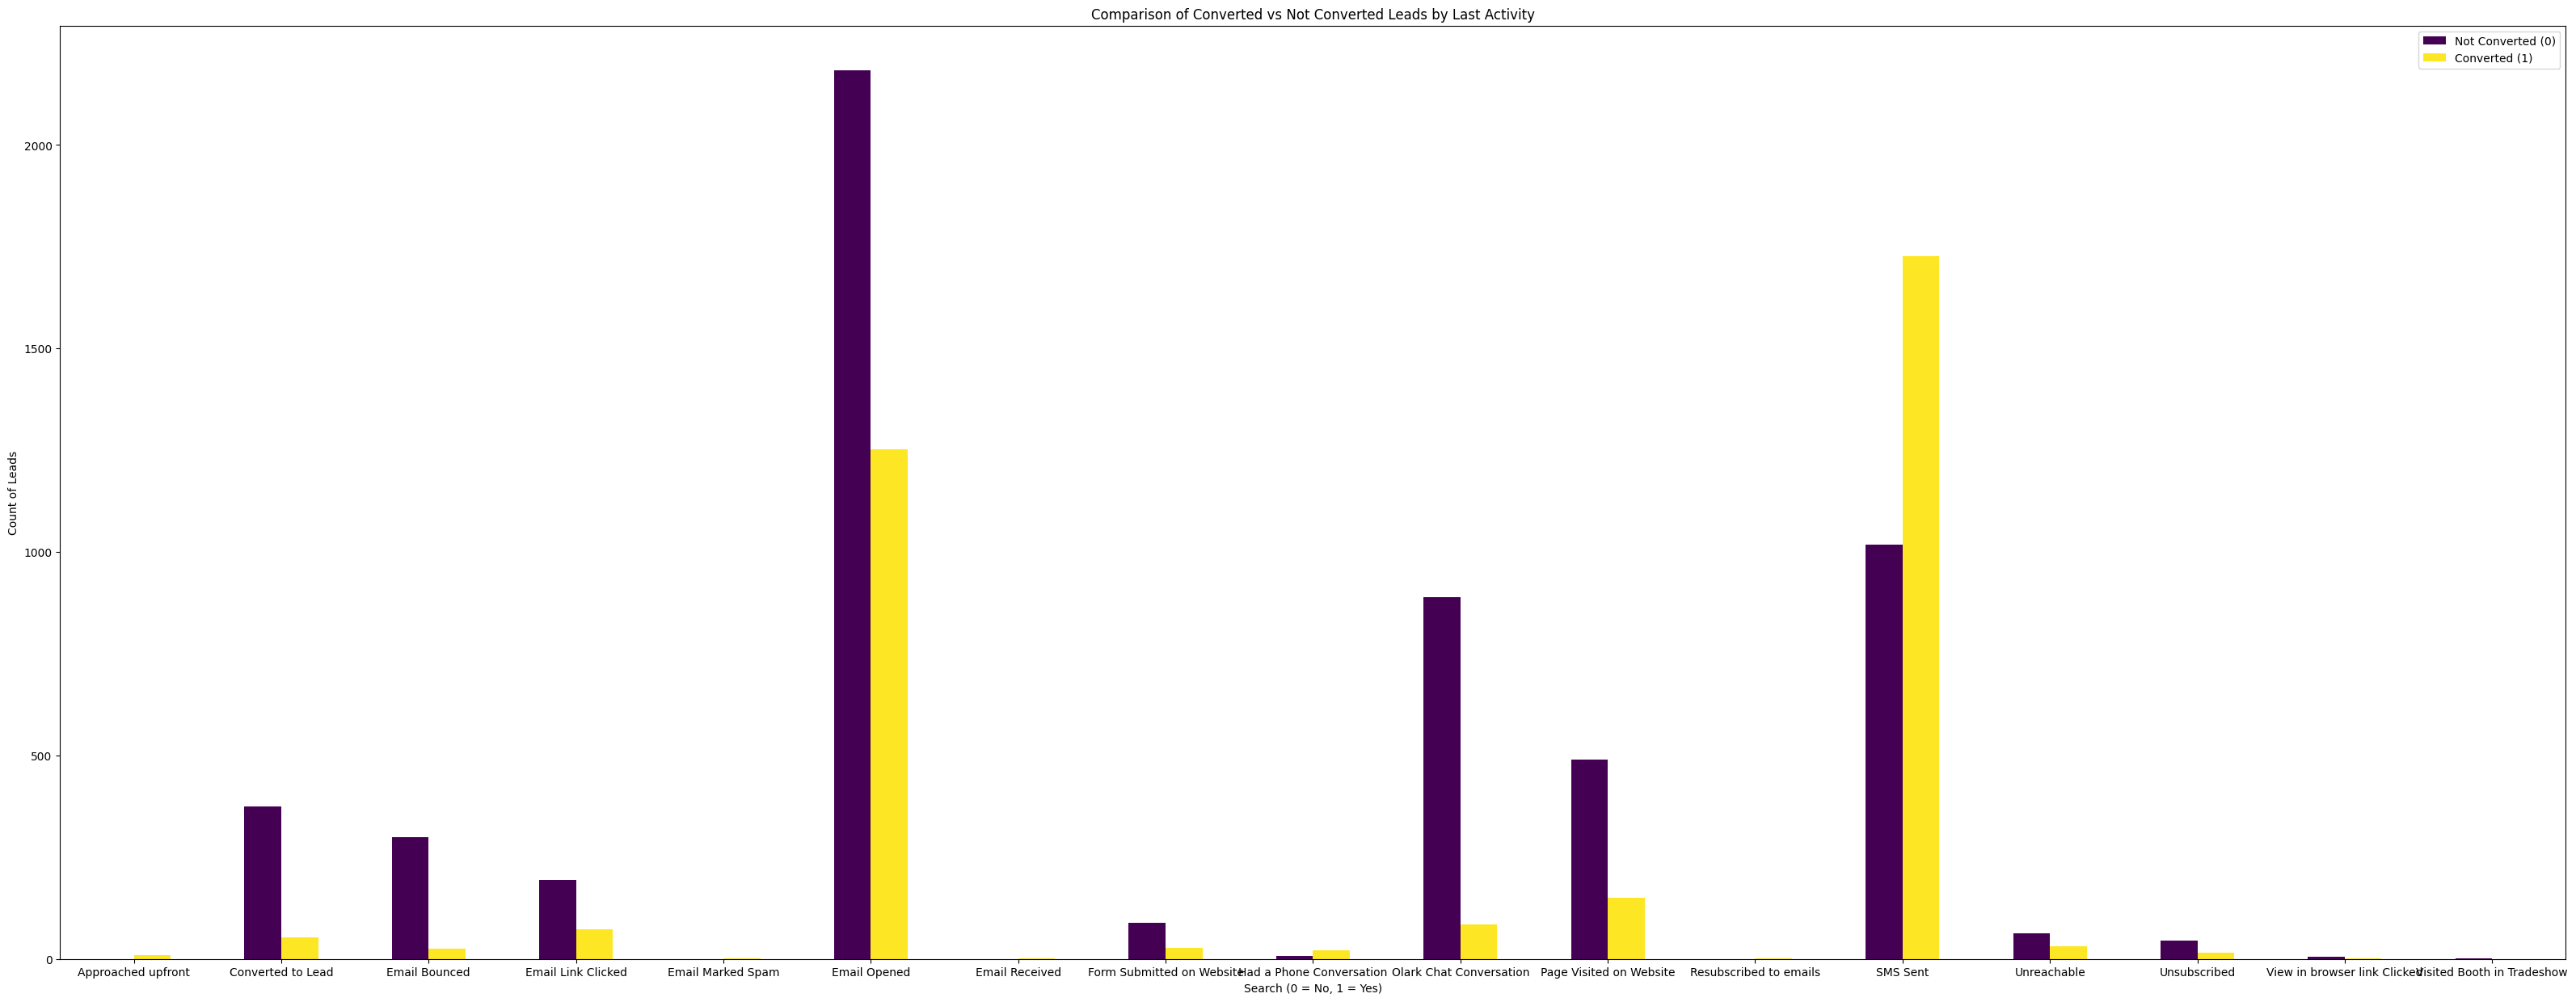

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of 'Converted' (0 and 1) for each 'Search' value
counts = df.groupby(['Last Activity', 'Converted']).size().unstack()

# Plot the grouped bar chart
counts.plot(kind='bar', figsize=(40, 15), colormap="viridis")

plt.xlabel("Search (0 = No, 1 = Yes)")
plt.ylabel("Count of Leads")
plt.title("Comparison of Converted vs Not Converted Leads by Last Activity")
plt.xticks(rotation=0)  # Keep x-axis labels readable
plt.legend(["Not Converted (0)", "Converted (1)"])  # Label the bars
plt.show()

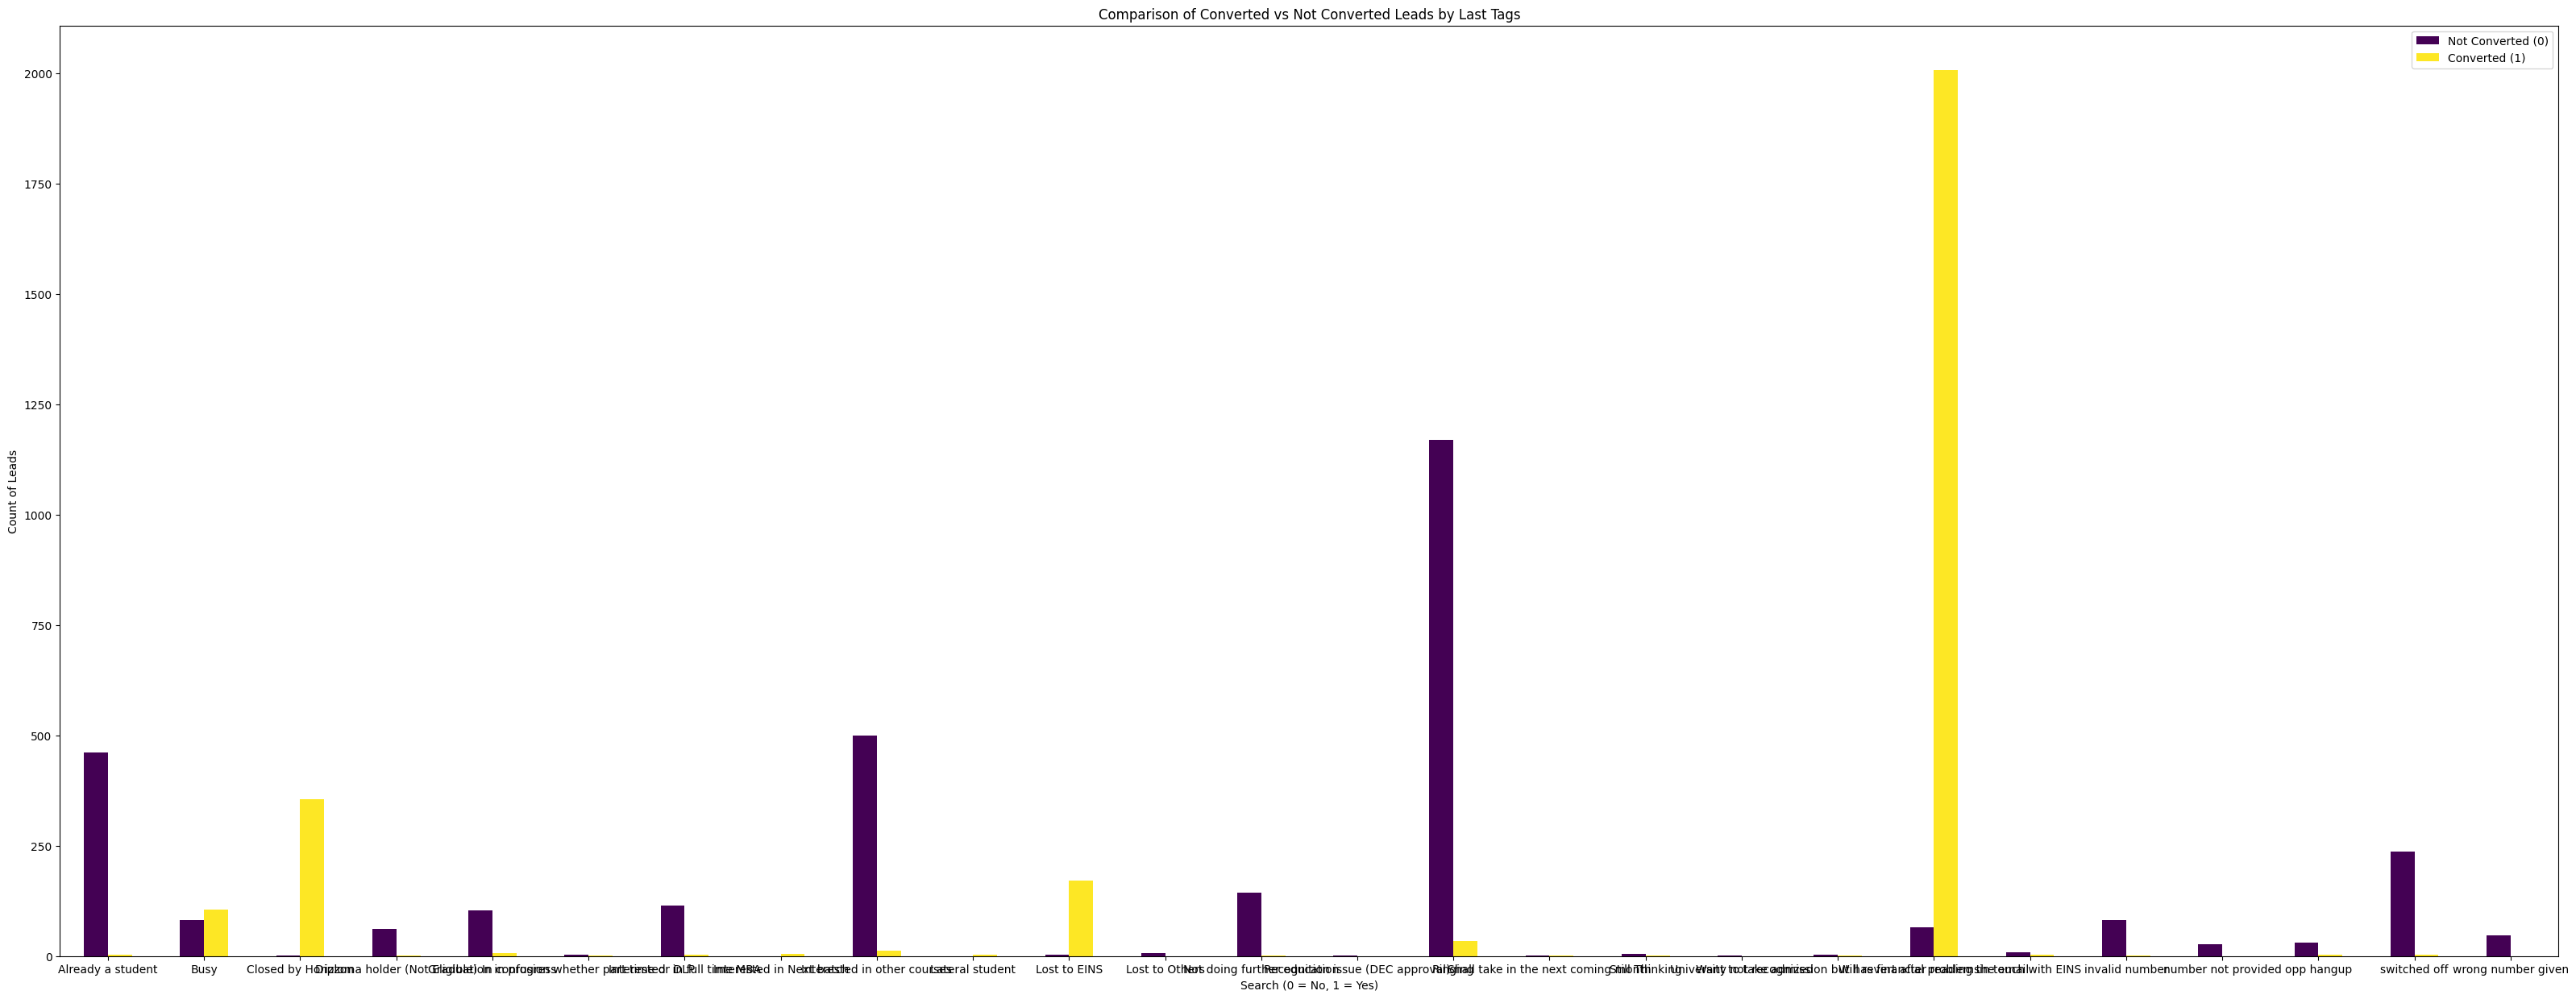

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of 'Converted' (0 and 1) for each 'Search' value
counts = df.groupby(['Tags', 'Converted']).size().unstack()

# Plot the grouped bar chart
counts.plot(kind='bar', figsize=(40, 15), colormap="viridis")

plt.xlabel("Search (0 = No, 1 = Yes)")
plt.ylabel("Count of Leads")
plt.title("Comparison of Converted vs Not Converted Leads by Last Tags")
plt.xticks(rotation=0)  # Keep x-axis labels readable
plt.legend(["Not Converted (0)", "Converted (1)"])  # Label the bars
plt.show()

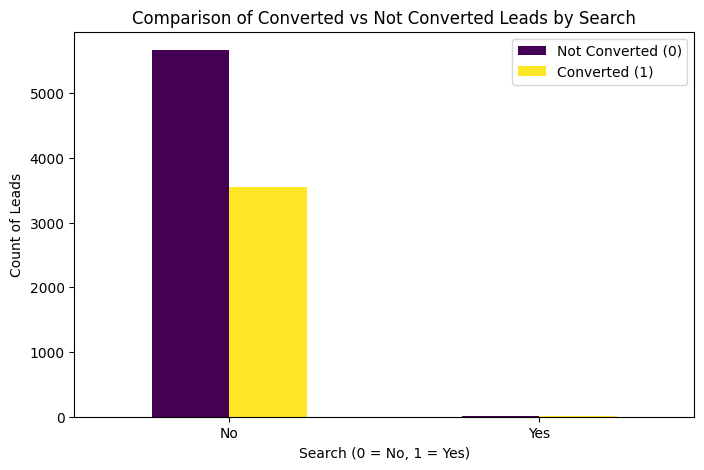

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of 'Converted' (0 and 1) for each 'Search' value
search_conversion_counts = df.groupby(['Search', 'Converted']).size().unstack()

# Plot the grouped bar chart
search_conversion_counts.plot(kind='bar', figsize=(8, 5), colormap="viridis")

plt.xlabel("Search (0 = No, 1 = Yes)")
plt.ylabel("Count of Leads")
plt.title("Comparison of Converted vs Not Converted Leads by Search")
plt.xticks(rotation=0)  # Keep x-axis labels readable
plt.legend(["Not Converted (0)", "Converted (1)"])  # Label the bars
plt.show()


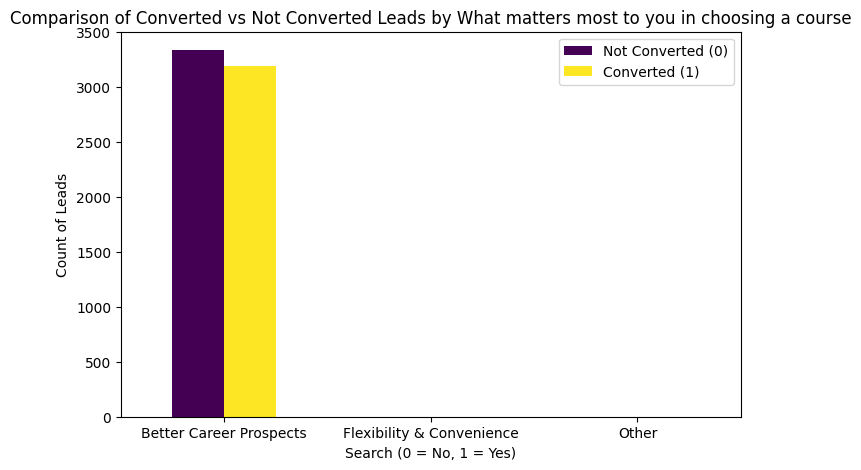

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of 'Converted' (0 and 1) for each 'Search' value
counts = df.groupby(['What matters most to you in choosing a course', 'Converted']).size().unstack()

# Plot the grouped bar chart
counts.plot(kind='bar', figsize=(8, 5), colormap="viridis")

plt.xlabel("Search (0 = No, 1 = Yes)")
plt.ylabel("Count of Leads")
plt.title("Comparison of Converted vs Not Converted Leads by What matters most to you in choosing a course")
plt.xticks(rotation=0)  # Keep x-axis labels readable
plt.legend(["Not Converted (0)", "Converted (1)"])  # Label the bars
plt.show()
